In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

header = ['i', 'success', 'method', 'preconditioning', 'dimension', 'point_number',
          'exact', 'h', 'absolute', 'fk', 'gradfk', 'k', 'time']
results_dir = '../results'

method_mapper = {
    0: 'Modified Newton',
    1: 'Truncated Newton',
}

In [3]:
def load_results(func):
    path = os.path.join(results_dir, func, 'results.csv')
    df = pd.read_csv(path, names=header)
    df.method = df.method.apply(lambda x: method_mapper[x])
    df.preconditioning = df.preconditioning.astype(bool)
    df.loc[df.fk.isna(), 'success'] = 0
    df.exact = df.exact.astype(bool)
    df.absolute = df.absolute.astype(bool)
    df.loc[:, 'fname'] = df.i.apply(lambda x: f"experiment_{x}.csv")
    df.set_index('i', inplace=True)
    for i, file in df.fname.items():
        path = os.path.join(results_dir, func, file)
        data = pd.read_csv(path)
        try:
            errors = data['error_norm'].iloc[-3:].values
            rate = np.log(errors[2]/errors[1]) / np.log(errors[1]/errors[0])
        except:
            rate = np.nan
        df.loc[i, 'rate'] = rate
    return df

In [4]:
def avg_table(df, method, exact, fname, absolute=None):
    table_df = df[
        (df.method == method) &
        (df.exact == exact)
    ].copy()
    # If finite differences, filter by h and add text
    if exact:
        differentiation_text = "with exact gradient and hessian"
        grouping = ['dimension', 'preconditioning']
    else:
        table_df = table_df[df.absolute == absolute]
        differentiation_text = f"with {'absolute' if absolute else 'relative'} finite differences"
        grouping = ['dimension', 'h', 'preconditioning']
        table_df.h = table_df.h.apply(lambda x: f"{x:.0e}")
    # Compute success rate and filter out unsuccessful attempts
    success_series = table_df.groupby(grouping).success.mean()
    table_df = table_df[table_df.success == 1]
    # Compute average metrics
    table_df = table_df.groupby(grouping)[['k', 'rate', 'time']].mean()
    table_df[['k', 'rate', 'time']] = table_df[['k', 'rate', 'time']].map(lambda x: f"{x:.3f}")
    # Add success rate to the table
    success_series = success_series.apply(lambda x: f"{x:.2f}")
    table_df = table_df.join(success_series).rename(
        {'success': 'success rate', 'rate': 'convergence rate', 'k': 'iterations'}, axis=1).unstack()
    text = table_df.to_latex(
        multicolumn_format='|c',
        column_format = 'r' + '|cc'*(table_df.shape[1] // 2) if exact else 'rr' + '|cc'*(table_df.shape[1] // 2),
        caption=f"Results for {method} method applied to {fname} {differentiation_text}, metrics are average metrics for succesful attempts.",
        label=f"tab:{method}_{fname}_{'exact' if exact else 'fd'}{'' if absolute is None else'_abs' if absolute else '_rel'}".replace(' ', '_'))
    text = text[:13] + "\n\\centering" + text[13:]
    return table_df, text

In [5]:
functions = ['extended_rosenbrock', 'generalized_broyden', 'banded_trigonometric']
fnames = ['Extended Rosenbrock', 'Generalized Broyden', 'Banded Trigonometric']
methods = ['Modified Newton', 'Truncated Newton']
exacts = [True, False]
hs = [10**x for x in range(-2, -14, -2)]
relatives = [True, False]
i = 0

for func, fname in zip(functions, fnames):
    try:
        df = load_results(func)
    except:
        print(f"Missing function {fname}")
        continue
    for method in methods:
        table_df, text = avg_table(df, method, True, fname)
        print(text)
    for method in methods:
        for absolute in [True, False]:
            table_df, text = avg_table(df, method, False, fname, absolute)
            print(text)

\begin{table}
\centering
\caption{Results for Modified Newton method applied to Extended Rosenbrock with exact gradient and hessian, metrics are average metrics for succesful attempts.}
\label{tab:Modified_Newton_Extended_Rosenbrock_exact}
\begin{tabular}{r|cc|cc|cc|cc}
\toprule
 & \multicolumn{2}{|c}{iterations} & \multicolumn{2}{|c}{convergence rate} & \multicolumn{2}{|c}{time} & \multicolumn{2}{|c}{success rate} \\
preconditioning & False & True & False & True & False & True & False & True \\
dimension &  &  &  &  &  &  &  &  \\
\midrule
3 & 32.000 & 30.182 & 2.001 & 2.229 & 0.036 & 0.023 & 1.00 & 1.00 \\
4 & 32.545 & 30.273 & 1.955 & 1.977 & 0.115 & 0.088 & 1.00 & 1.00 \\
5 & 33.455 & 31.727 & 1.896 & 2.103 & 1.131 & 0.717 & 1.00 & 1.00 \\
\bottomrule
\end{tabular}
\end{table}

\begin{table}
\centering
\caption{Results for Truncated Newton method applied to Extended Rosenbrock with exact gradient and hessian, metrics are average metrics for succesful attempts.}
\label{tab:Truncated

/tmp/ipykernel_85453/605965027.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  table_df = table_df[df.absolute == absolute]
/tmp/ipykernel_85453/605965027.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  table_df = table_df[df.absolute == absolute]
/tmp/ipykernel_85453/605965027.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  table_df = table_df[df.absolute == absolute]
/tmp/ipykernel_85453/605965027.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  table_df = table_df[df.absolute == absolute]
/tmp/ipykernel_85453/2421082506.py:16: RuntimeWarning: invalid value encountered in scalar divide
  rate = np.log(errors[2]/errors[1]) / np.log(errors[1]/errors[0])
/tmp/ipykernel_85453/2421082506.py:16: RuntimeWarning: invalid value encountered in scalar divide
  rate = np.log(errors[2]/errors[1]) / np.log(errors[1]/errors[0])
/tmp/ipykernel_85453/24210

\begin{table}
\centering
\caption{Results for Modified Newton method applied to Generalized Broyden with exact gradient and hessian, metrics are average metrics for succesful attempts.}
\label{tab:Modified_Newton_Generalized_Broyden_exact}
\begin{tabular}{r|cc|cc|cc|cc}
\toprule
 & \multicolumn{2}{|c}{iterations} & \multicolumn{2}{|c}{convergence rate} & \multicolumn{2}{|c}{time} & \multicolumn{2}{|c}{success rate} \\
preconditioning & False & True & False & True & False & True & False & True \\
dimension &  &  &  &  &  &  &  &  \\
\midrule
3 & 8.636 & 8.636 & 1.974 & 1.978 & 0.006 & 0.005 & 1.00 & 1.00 \\
4 & 8.000 & 8.273 & 1.829 & 1.849 & 0.037 & 0.034 & 1.00 & 1.00 \\
5 & 7.909 & 10.545 & 1.794 & 1.989 & 0.291 & 0.300 & 1.00 & 1.00 \\
\bottomrule
\end{tabular}
\end{table}

\begin{table}
\centering
\caption{Results for Truncated Newton method applied to Generalized Broyden with exact gradient and hessian, metrics are average metrics for succesful attempts.}
\label{tab:Truncated_Newt

/tmp/ipykernel_85453/605965027.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  table_df = table_df[df.absolute == absolute]
/tmp/ipykernel_85453/605965027.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  table_df = table_df[df.absolute == absolute]
/tmp/ipykernel_85453/605965027.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  table_df = table_df[df.absolute == absolute]
/tmp/ipykernel_85453/605965027.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  table_df = table_df[df.absolute == absolute]
/tmp/ipykernel_85453/2421082506.py:16: RuntimeWarning: invalid value encountered in scalar divide
  rate = np.log(errors[2]/errors[1]) / np.log(errors[1]/errors[0])
/tmp/ipykernel_85453/2421082506.py:16: RuntimeWarning: invalid value encountered in scalar divide
  rate = np.log(errors[2]/errors[1]) / np.log(errors[1]/errors[0])
/tmp/ipykernel_85453/24210

\begin{table}
\centering
\caption{Results for Modified Newton method applied to Banded Trigonometric with exact gradient and hessian, metrics are average metrics for succesful attempts.}
\label{tab:Modified_Newton_Banded_Trigonometric_exact}
\begin{tabular}{r|cc|cc}
\toprule
 & iterations & convergence rate & time & success rate \\
preconditioning & True & True & True & True \\
dimension &  &  &  &  \\
\midrule
3 & 14.273 & 2.782 & 0.018 & 1.00 \\
4 & 7.000 & 2.946 & 0.021 & 0.09 \\
5 & 7.000 & 2.946 & 0.115 & 0.09 \\
\bottomrule
\end{tabular}
\end{table}

\begin{table}
\centering
\caption{Results for Truncated Newton method applied to Banded Trigonometric with exact gradient and hessian, metrics are average metrics for succesful attempts.}
\label{tab:Truncated_Newton_Banded_Trigonometric_exact}
\begin{tabular}{r|cc|cc}
\toprule
 & iterations & convergence rate & time & success rate \\
preconditioning & True & True & True & True \\
dimension &  &  &  &  \\
\midrule
3 & 14.273 & 2.790 &

/tmp/ipykernel_85453/605965027.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  table_df = table_df[df.absolute == absolute]
/tmp/ipykernel_85453/605965027.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  table_df = table_df[df.absolute == absolute]
/tmp/ipykernel_85453/605965027.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  table_df = table_df[df.absolute == absolute]
/tmp/ipykernel_85453/605965027.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  table_df = table_df[df.absolute == absolute]


In [6]:
df = load_results('banded_trigonometric')

/tmp/ipykernel_85453/2421082506.py:16: RuntimeWarning: invalid value encountered in scalar divide
  rate = np.log(errors[2]/errors[1]) / np.log(errors[1]/errors[0])
/tmp/ipykernel_85453/2421082506.py:16: RuntimeWarning: invalid value encountered in scalar divide
  rate = np.log(errors[2]/errors[1]) / np.log(errors[1]/errors[0])
/tmp/ipykernel_85453/2421082506.py:16: RuntimeWarning: invalid value encountered in scalar divide
  rate = np.log(errors[2]/errors[1]) / np.log(errors[1]/errors[0])
/tmp/ipykernel_85453/2421082506.py:16: RuntimeWarning: invalid value encountered in scalar divide
  rate = np.log(errors[2]/errors[1]) / np.log(errors[1]/errors[0])
/tmp/ipykernel_85453/2421082506.py:16: RuntimeWarning: invalid value encountered in scalar divide
  rate = np.log(errors[2]/errors[1]) / np.log(errors[1]/errors[0])
/tmp/ipykernel_85453/2421082506.py:16: RuntimeWarning: invalid value encountered in scalar divide
  rate = np.log(errors[2]/errors[1]) / np.log(errors[1]/errors[0])
/tmp/ipyke

In [7]:
df[(df.success == 0) & (df.k != 1000)]

,success,method,preconditioning,dimension,point_number,exact,h,absolute,fk,gradfk,k,time,fname,rate
i,,,,,,,,,,,,,,
369,0,Modified Newton,True,4,3,False,0.0100,False,2.917659e+04,1640.609242,62,0.273823,experiment_369.csv,0.103218
425,0,Modified Newton,True,4,5,False,0.0001,False,4.483249e+04,1315.449139,33,0.142102,experiment_425.csv,NaN
529,0,Modified Newton,True,4,9,False,0.0001,False,2.450630e+04,628.273664,81,0.378434,experiment_529.csv,NaN
629,0,Modified Newton,True,5,2,False,0.0100,False,1.823277e+05,7908.152686,57,1.995399,experiment_629.csv,0.000000
711,0,Modified Newton,True,5,5,False,0.0001,False,3.335080e+06,126297.111416,20,0.480879,experiment_711.csv,1.678914
737,0,Modified Newton,True,5,6,False,0.0001,False,6.979085e+05,20058.440857,260,12.275975,experiment_737.csv,NaN
841,0,Modified Newton,True,5,10,False,0.0001,False,4.038308e+05,2767.715388,63,1.433319,experiment_841.csv,2.188348


In [8]:
df = load_results('extended_rosenbrock')
df[(df.method=="Modified Newton") & (df.exact==False) & (df.absolute==False)]

,success,method,preconditioning,dimension,point_number,exact,h,absolute,fk,gradfk,k,time,fname,rate
i,,,,,,,,,,,,,,
9,1,Modified Newton,False,3,0,False,1.000000e-02,False,8.918937e-02,9.867168e-07,134,0.054039,experiment_9.csv,0.999999
11,1,Modified Newton,True,3,0,False,1.000000e-02,False,8.918937e-02,9.867152e-07,134,0.058029,experiment_11.csv,1.000008
17,1,Modified Newton,False,3,0,False,1.000000e-04,False,1.003239e-09,9.124745e-08,24,0.009421,experiment_17.csv,0.999760
19,1,Modified Newton,True,3,0,False,1.000000e-04,False,1.003239e-09,9.124660e-08,24,0.010755,experiment_19.csv,0.999760
25,1,Modified Newton,False,3,0,False,1.000000e-06,False,4.338957e-17,5.747705e-09,21,0.007469,experiment_25.csv,2.995362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,1,Modified Newton,True,5,10,False,1.000000e-08,False,2.306925e-18,1.688671e-08,33,0.786457,experiment_1699.csv,1.999153
1705,1,Modified Newton,False,5,10,False,1.000000e-10,False,1.186506e-18,2.195068e-08,35,1.336804,experiment_1705.csv,1.815433
1707,1,Modified Newton,True,5,10,False,1.000000e-10,False,1.603279e-18,1.729106e-08,33,0.848377,experiment_1707.csv,1.999736


## Extended Rosenbrock function

In [9]:
# Run the following code only if latex is available on the system
plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'font.serif': 'Times',
    'font.size': 12,
    'text.usetex': True,
    'pgf.rcfonts': False,
})

figures_folder = "../report/figures"

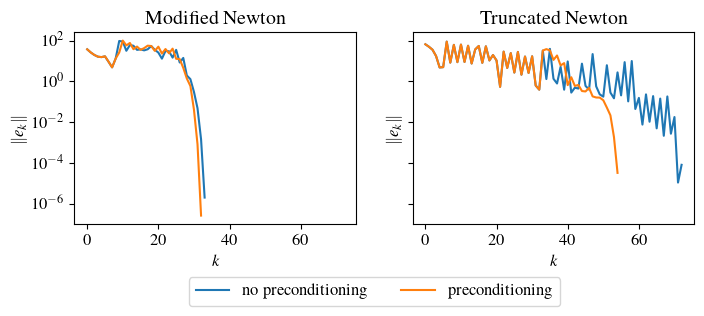

In [10]:
df = load_results('extended_rosenbrock')
idx = df[(df.dimension==5) & (df.exact == True) & (df.point_number == 1)].index.values
fig, axs = plt.subplots(1, 2, figsize=(8,2.5), sharex=True, sharey=True)
for i in idx:
    expdf = pd.read_csv(os.path.join(results_dir, 'extended_rosenbrock', f"experiment_{i}.csv"))
    k = 0 if df.loc[i, 'method'] == 'Modified Newton' else 1
    axs[k].plot(expdf['error_norm'], label="preconditioning" if df.loc[i, 'preconditioning'] else "no preconditioning")
for ax in axs:
    ax.set_yscale('log')
    ax.set_ylabel('$\Vert e_k \Vert$')
    ax.set_xlabel('$k$')
by_label = {label: line for line, label in zip(*axs[0].get_legend_handles_labels())}
fig.legend(by_label.values(), by_label.keys(), loc='lower center', ncol=2, bbox_to_anchor=(0.5, -.25))
axs[0].set_title('Modified Newton')
axs[1].set_title('Truncated Newton')
fig.savefig(os.path.join(figures_folder, 'extended_rosenbrock_error.pdf'), bbox_inches='tight')

## Banded trigonometric problem

In [54]:
df = load_results('banded_trigonometric')

/tmp/ipykernel_85453/2421082506.py:16: RuntimeWarning: invalid value encountered in scalar divide
  rate = np.log(errors[2]/errors[1]) / np.log(errors[1]/errors[0])
/tmp/ipykernel_85453/2421082506.py:16: RuntimeWarning: invalid value encountered in scalar divide
  rate = np.log(errors[2]/errors[1]) / np.log(errors[1]/errors[0])
/tmp/ipykernel_85453/2421082506.py:16: RuntimeWarning: invalid value encountered in scalar divide
  rate = np.log(errors[2]/errors[1]) / np.log(errors[1]/errors[0])
/tmp/ipykernel_85453/2421082506.py:16: RuntimeWarning: invalid value encountered in scalar divide
  rate = np.log(errors[2]/errors[1]) / np.log(errors[1]/errors[0])
/tmp/ipykernel_85453/2421082506.py:16: RuntimeWarning: invalid value encountered in scalar divide
  rate = np.log(errors[2]/errors[1]) / np.log(errors[1]/errors[0])
/tmp/ipykernel_85453/2421082506.py:16: RuntimeWarning: invalid value encountered in scalar divide
  rate = np.log(errors[2]/errors[1]) / np.log(errors[1]/errors[0])
/tmp/ipyke

In [12]:
df_failure = df.loc[df.success == 0]
series_failure = df_failure.groupby(['exact', 'absolute', 'dimension'])['success'].count()

In [13]:
iter_failure = df_failure.loc[df.k != 1000].groupby(['exact', 'absolute', 'dimension'])['success'].count()
iter_failure / series_failure

exact  absolute  dimension
False  False     3                 NaN
                 4            0.049180
                 5            0.065574
       True      4                 NaN
                 5                 NaN
True   False     4                 NaN
                 5                 NaN
Name: success, dtype: float64

In [14]:
pd.DataFrame([iter_failure, series_failure], index=['armijo fail', 'total fail']).T.fillna(0)

armijo fail  total fail
exact absolute dimension                         
False False    4                  3.0        61.0
               5                  4.0        61.0
               3                  0.0        22.0
      True     4                  0.0        58.0
               5                  0.0        60.0
True  False    4                  0.0        10.0
               5                  0.0        10.0

/tmp/ipykernel_85453/2421082506.py:16: RuntimeWarning: invalid value encountered in scalar divide
  rate = np.log(errors[2]/errors[1]) / np.log(errors[1]/errors[0])
/tmp/ipykernel_85453/2421082506.py:16: RuntimeWarning: invalid value encountered in scalar divide
  rate = np.log(errors[2]/errors[1]) / np.log(errors[1]/errors[0])
/tmp/ipykernel_85453/2421082506.py:16: RuntimeWarning: invalid value encountered in scalar divide
  rate = np.log(errors[2]/errors[1]) / np.log(errors[1]/errors[0])
/tmp/ipykernel_85453/2421082506.py:16: RuntimeWarning: invalid value encountered in scalar divide
  rate = np.log(errors[2]/errors[1]) / np.log(errors[1]/errors[0])
/tmp/ipykernel_85453/2421082506.py:16: RuntimeWarning: invalid value encountered in scalar divide
  rate = np.log(errors[2]/errors[1]) / np.log(errors[1]/errors[0])
/tmp/ipykernel_85453/2421082506.py:16: RuntimeWarning: invalid value encountered in scalar divide
  rate = np.log(errors[2]/errors[1]) / np.log(errors[1]/errors[0])
/tmp/ipyke

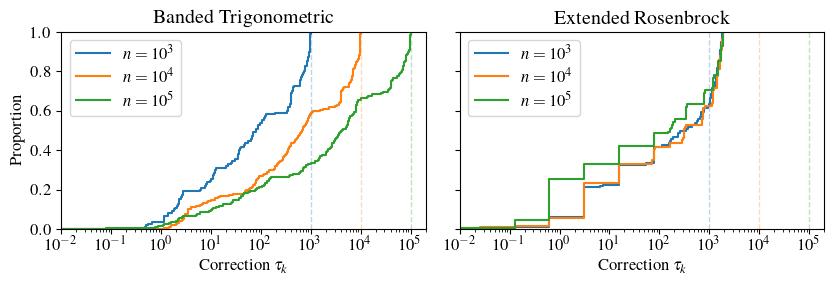

In [88]:
fig, axs, = plt.subplots(1, 2, figsize=(8.5,3), sharex=True, sharey=True)
for ax, func_name in zip(axs, ["Banded Trigonometric", "Extended Rosenbrock"]):
    func_dir_name = func_name.lower().replace(" ", "_")
    df = load_results(func_dir_name)
    for dim, dim_df in df[df.exact & (df.method == "Modified Newton")].groupby('dimension'):
        taus = pd.Series()
        for i, _ in dim_df.iterrows():
            fname = os.path.join(results_dir, func_dir_name, f"experiment_{i}.csv")
            exp_df = pd.read_csv(fname)
            taus = pd.concat([taus, exp_df.correction], ignore_index=True)
        taus = taus[taus != 0]
        sns.ecdfplot(taus, label=f"$n=10^{dim}$", ax=ax)
    ax.legend()
    ax.set_xscale('log')
    ax.set_xlabel("Correction $\\tau_k$")
    ax.set_xlim(1e-2, 2e5)
    ax.set_title(func_name)
    for thresh, color in zip(range(3, 6), ['tab:blue', 'tab:orange', 'tab:green']):
        ax.axvline(10**thresh, linewidth=1, alpha=.3, color=color, linestyle='--')
fig.tight_layout()
fig.savefig(os.path.join(figures_folder, 'correction_comparison.pdf'))
